In [2]:
import numpy as np
import pandas as pd
import re

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [3]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,independent,sector 28,4.5,125000.0,360.0,Built Up area: 360 (33.45 sq.m.),4,4,0,not available,4.0,NaN,undefined,NaN,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN


In [4]:
df.shape

(3674, 17)

In [5]:
df.sample(4)[['area','areaWithType']]

,area,areaWithType
1858,1380.0,Super Built up area 1380(128.21 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.)
2691,1290.0,Built Up area: 1498 (139.17 sq.m.)Carpet area: 1064 sq.ft. (98.85 sq.m.)
467,1500.0,Carpet area: 1500 (139.35 sq.m.)
936,1076.0,Super Built up area 1076(99.96 sq.m.)


In [6]:
## This function extracts the Super Built up area

def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)' , text)
    #rint(match)
    if match:
        #rint(match.group(1))
        return float(match.group(1))
    return None

get_super_built_up_area('Super Built up area 3000(278.71 sq.m.)Carpet area: 2950 sq.ft. (274.06 sq.m.)') #example

3000.0

In [7]:
# This function extracts the Built Up area or Carpet area
def get_area(text,area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match :
        return float(match.group(1))
    return None


In [8]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [9]:
# Extract Super Built up area and convert to sqft if needed

df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)

In [10]:
df.sample(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area
1147,flat,shree vardhman victoria,sector 70,1.67,14384.0,1161.0,Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.),3,5,3,servant room,5.0,North-East,5 to 10 Year Old,"['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']","['3 Wardrobe', '3 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1950.0
1832,flat,sobha city,sector 108,2.90,14478.0,2003.0,Super Built up area 2003(186.08 sq.m.),3,4,2,not available,11.0,North-East,1 to 5 Year Old,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']",[],"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2003.0


In [11]:
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

In [12]:
df.sample(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area
1573,house,ardee city,sector 52,2.25,16071.0,1400.0,Plot area 2160(200.67 sq.m.)Built Up area: 1800 sq.ft. (167.23 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3,servant room,4.0,South-East,0 to 1 Year Old,"['Hanuman Mandir', 'New Life Church', 'Radhakrishna Shani Mandir', 'Hdfc ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Arihant Hospital', 'Gupta', 'Paras Hospital Gurgaon', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Naval Mendiratta', 'Anand Hospital Gurgaon', 'Surgicare Hospital Gurgaon', 'Dr. Kutbuddin Akbary', 'Kriti Hospital', 'Pernod Ricard Charitable Dispensary', 'City Medical', 'Gardian Pharmacy', 'Bharat petroleum', 'Heera Fuel Station', 'HCG CNG Station', '222', 'Hdfc bank', 'Icici bank', 'Hdfc bank & atm', 'PWO house', 'Cafe Tonini', 'Sagar Ratna', 'Raj Restaurant', ""Carl's Jr."", 'Shophouse by Kylin', 'Starbucks', 'Balaji Vegetarian Paradise', 'Clock tower', 'St. Angels Sr', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'St. Angels Jr', 'Amity Global School', 'Manav Rachna School', 'Manav Rachna Swimming Pool', 'Ncr library']","['3 Wardrobe', '7 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '15 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Private Garden / Terrace', 'Maintenance Staff', 'Visitor Parking']",NaN


In [13]:
# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [14]:
# accomplish separated category of areawithtype 
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
29,2.95,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
1831,0.30,flat,362.0,Carpet area: 361.88 (33.62 sq.m.),NaN,NaN,361.882318
2679,2.12,flat,1365.0,Super Built up area 1365(126.81 sq.m.)Built Up area: 1350 sq.ft. (125.42 sq.m.)Carpet area: 1300 sq.ft. (120.77 sq.m.),1365.0,1350.0,1300.000000
3653,2.58,flat,2200.0,Super Built up area 2200(204.39 sq.m.),2200.0,NaN,NaN
1202,0.45,flat,600.0,Super Built up area 600(55.74 sq.m.),600.0,NaN,NaN


In [15]:
# all three values are available and not nan 
#df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(4)   

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3071,0.82,flat,1360.0,Super Built up area 1360(126.35 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),1360.0,1300.0,1000.0
2912,1.10,flat,1928.0,Super Built up area 1928(179.12 sq.m.)Built Up area: 1580 sq.ft. (146.79 sq.m.)Carpet area: 1391 sq.ft. (129.23 sq.m.),1928.0,1580.0,1391.0
1474,2.45,flat,2132.0,Super Built up area 2132(198.07 sq.m.)Built Up area: 1800 sq.ft. (167.23 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),2132.0,1800.0,1500.0
1464,1.20,flat,1650.0,Super Built up area 1650(153.29 sq.m.)Built Up area: 1450 sq.ft. (134.71 sq.m.)Carpet area: 1150 sq.ft. (106.84 sq.m.),1650.0,1450.0,1150.0


In [16]:
df[ ~(df['super_built_up_area'].isnull() | df['built_up_area'].isnull() | df['carpet_area'].isnull() ) ].shape # 531 rows are complete

(531, 20)

In [17]:
df[ df['areaWithType'].str.contains('Plot') ][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,10.56,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
4,2.20,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,NaN,NaN
5,6.00,house,4140.0,Plot area 4140(384.62 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.),NaN,9000.0,NaN
26,1.20,house,846.0,Plot area 846(78.6 sq.m.)Built Up area: 846 sq.ft. (78.6 sq.m.),NaN,846.0,NaN
29,2.95,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN


In [18]:
# all 3 categories of areaWithType is nan
all_nan_df = df [ df['super_built_up_area'].isnull() & df['built_up_area'].isnull() &df['carpet_area'].isnull() ][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,10.56,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
4,2.20,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,NaN,NaN
29,2.95,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
30,10.00,house,550.0,Plot area 550(51.1 sq.m.),NaN,NaN,NaN
38,0.75,house,360.0,Plot area 40(33.45 sq.m.),NaN,NaN,NaN


In [19]:
all_nan_df_ind = all_nan_df.index
all_nan_df_ind

Index([   3,    4,   29,   30,   38,   59,   65,   78,   83,   85,
       ...
       3635, 3639, 3641, 3642, 3643, 3650, 3656, 3657, 3668, 3671],
      dtype='int64', length=544)

In [20]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [21]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [22]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,10.56,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
4,2.20,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,1800.00,NaN
29,2.95,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
30,10.00,house,550.0,Plot area 550(51.1 sq.m.),NaN,550.00,NaN
38,0.75,house,360.0,Plot area 40(33.45 sq.m.),NaN,40.00,NaN
59,1.70,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,1800.00,NaN
65,0.95,house,450.0,Plot area 450(41.81 sq.m.),NaN,450.00,NaN
78,4.35,house,1836.0,Plot area 204(170.57 sq.m.),NaN,204.00,NaN
83,15.10,house,8116.0,Plot area 754,NaN,754.00,NaN
85,3.60,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.00,NaN


In [23]:
# area not equal to builtup area in some regions somewhere it is in sq.ft and sq.mt  3240 = 360 * 9 , x = y * 10.7
    
def convert_scale(row):
    
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] *  9
        
        elif round(row['area']/row['built_up_area'])== 11.0:
            return row['built_up_area'] * 10.7
        
        else:
            return row['built_up_area']
        

In [24]:
# axis 1 means both col ki rows ek sath individual input mei jaayenge
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis= 1) 

In [25]:
all_nan_df # now we have exact same val in area and builtuparea

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,10.56,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
4,2.20,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,1800.00,NaN
29,2.95,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN
30,10.00,house,550.0,Plot area 550(51.1 sq.m.),NaN,550.00,NaN
38,0.75,house,360.0,Plot area 40(33.45 sq.m.),NaN,360.00,NaN
59,1.70,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,1800.00,NaN
65,0.95,house,450.0,Plot area 450(41.81 sq.m.),NaN,450.00,NaN
78,4.35,house,1836.0,Plot area 204(170.57 sq.m.),NaN,1836.00,NaN
83,15.10,house,8116.0,Plot area 754,NaN,8067.80,NaN
85,3.60,house,1449.0,Plot area 161(134.62 sq.m.),NaN,1449.00,NaN


In [26]:
# update the original dataframe
df.update(all_nan_df)

In [27]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    17
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 22
facing                 1042
agePossession             1
nearbyLocations         166
furnishDetails          941
features                593
super_built_up_area    1800
built_up_area          1985
carpet_area            1802
dtype: int64

In [28]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,independent,sector 28,4.50,125000.0,360.0,Built Up area: 360 (33.45 sq.m.),4,4,0,not available,4.0,NaN,undefined,NaN,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,360.0,NaN
1,flat,emaar mgf the palm drive,sector 66,2.80,14358.0,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up area: 1920 sq.ft. (178.37 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),3,3,2,"servant room,study room,pooja room",12.0,East,0 to 1 Year Old,"['Sector 55-56 Rapid Metro Station', 'HUB 66', 'NH 248A', 'Hasanpur', 'Ashoka International School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi International Airport', 'Sealdah', 'Vatika Business Centre', 'The Oberoi Gurgaon', 'De Adventure Park', 'DLF Golf and Country Club', 'Tau DeviLal Sports Complex']","['6 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '5 Geyser', '1 Stove', '5 Light', '1 Modular Kitchen', '1 Curtains', '3 TV', '1 Chimney', '5 AC', '4 Bed', '5 Wardrobe', '1 Sofa', 'No Microwave', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1950.0,1920.0,1600.0
2,flat,hero homes,sector 104,1.90,11249.0,1689.0,Super Built up area 1689(156.91 sq.m.)Carpet area: 1082 sq.ft. (100.52 sq.m.),3,3,3,pooja room,16.0,NaN,Mar 2025,"['Basai Metro Station', 'HUDA Market', 'Dwarka Expressway', 'Kings International School', 'Aryan Hospital', 'IGI Airport', 'Gurugram Railway Station']","['1 Water Purifier', '1 Exhaust Fan', '3 Geyser', '5 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1689.0,NaN,1082.0
3,house,independent,sector 50,10.56,32593.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3,servant room,3.0,NaN,5 to 10 Year Old,"['Radhakrishna Shani Mandir', 'Standard chartered ATM', 'Icici bank ATM', 'Vatsalya Clinic', 'Meher Clinic', 'Bones Clinic - Orthopaedics', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Neelkanth Health Care', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Skin Clinic', 'Best Urologist Atcomplete Family Clinic', 'Divine Look Clinic Centre', 'Sukhmani Hospital Pvt. Ltd', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Wembley estate club', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'SPAZE BUSINESS PARK', 'Unitech', 'India Oil', 'Hdfc bank', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'SRS Cinemas', 'Madison and Pike', 'India', 'Haldiram', ""Domino's Pizza"", ""Nirula's"", 'Starbucks', 'Nook', 'Kamla International', 'Gurugram University', 'Delhi Public School Primary Section', 'Amity Global School', 'Manav Rachna School', 'St. Angels Sr', 'Manav Rachna Swimming Pool']",NaN,"['Maintenance Staff', 'Water Storage', 'Visitor Parking']",NaN,3240.0,NaN
4,house,not applicable,sector 11,2.20,12222.0,1800.0,Plot area 1800(167.23 sq.m.),4,3,2,"pooja room,study room",1.0,South,10+ Year Old,

# 2. additionalRoom

In [29]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1510
servant room                                      688
study room                                        243
others                                            218
pooja room                                        164
store room                                         97
study room,servant room                            97
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                55
pooja room,study room,servant room,others          54
pooja room,study room,servant room                 53
servant room,pooja room                            38
servant room,store room                            31
study room,others                                  26
pooja room,study room                              21
pooja room,others                                  16
pooja room,store room                              15
pooja room,st

In [30]:
# additional room
# list of new columns to be created because too many categories are in group in 1 row ohe
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [31]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3112,servant room,0,1,0,0,0
1857,"pooja room,servant room",0,1,0,1,0
3125,servant room,0,1,0,0,0
3472,not available,0,0,0,0,0
2062,servant room,0,1,0,0,0


# agePossesion

In [32]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1646
5 to 10 Year Old       562
0 to 1 Year Old        502
undefined              305
10+ Year Old           301
Under Construction      87
Within 6 months         67
Within 3 months         24
Dec 2023                20
By 2023                 17
By 2024                 16
Dec 2024                15
Mar 2024                12
Jun 2024                 7
Jan 2024                 7
Dec 2025                 7
Aug 2023                 6
Oct 2024                 6
Nov 2023                 5
Aug 2024                 4
Sep 2023                 4
Oct 2023                 4
By 2025                  4
Jul 2024                 3
Jan 2025                 3
Nov 2024                 3
May 2024                 3
Feb 2024                 3
By 2027                  2
Jan 2026                 2
Sep 2025                 2
Jul 2027                 2
Jun 2027                 2
Jul 2025                 2
Dec 2026                 2
Aug 2025                 2
Apr 2026      

In [33]:
def categorize_age_possession(value):
    
    if pd.isna(value):
        return "Undefined"
    
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    
    if "10+ Year Old" in value:
        return "Old Property"
    
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # for entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [34]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [35]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         562
Undefined              306
Old Property           301
Under Construction     266
Name: count, dtype: int64

# 4 furnihsdetails

In [36]:
df.sample(5)[['furnishDetails','features']] # very dangerous col. so much data in just one col.

,furnishDetails,features
167,"['5 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
1505,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Shopping Centre', 'Waste Disposal', 'Rain Water Harvesting']"
3571,"['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '5 Geyser', '52 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']"
812,"['2 Fan', '1 Dining Table', '1 Geyser', '3 Light', '1 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '1 Bed', '1 Wardrobe', '1 Sofa', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting']"
799,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [37]:
# taken help from CHATGPT 
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
    
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    
    if isinstance(details, str):
        
        if f"No {furnishing}" in details:
            return 0
        
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        
        if match:
            return int(match.group(1) )
        elif furnishing in details:
            return 1
        
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [38]:
furnishings_df.shape

(3674, 19)

In [39]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\ritik\AppData\Local\Temp\ipykernel_30336\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [40]:
furnishings_df.sample(5)

,Stove,Wardrobe,Curtains,Washing Machine,Bed,Chimney,Light,Geyser,Exhaust Fan,TV,Fridge,Dining Table,Sofa,Water Purifier,Microwave,Modular Kitchen,Fan,AC
926,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
126,0,3,1,1,3,1,14,3,1,3,1,0,0,1,1,1,10,3
1979,0,1,1,0,0,1,6,1,1,0,0,0,0,1,0,1,5,0
3281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2425,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# how many groups we should divide the flats on the basis of commodities oor accissories 1,2 or 3 or more 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [43]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

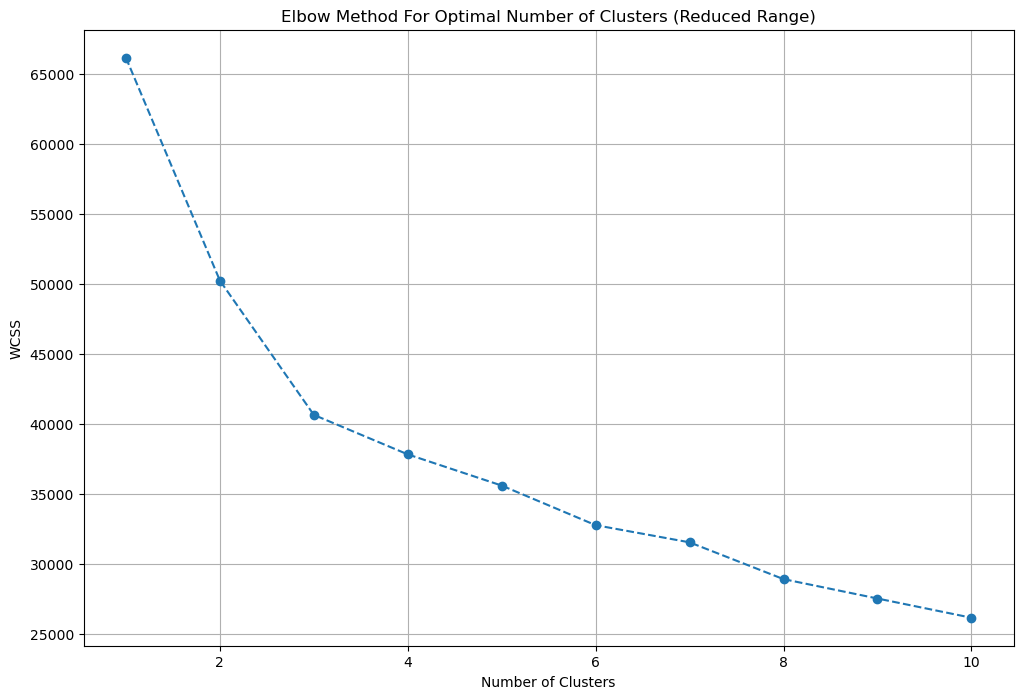

In [44]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [45]:
# therefore since 3 is the point where slope decreasses gradually so we chose to divide 19 items --> into 3 categories 

n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [46]:
df = df.iloc[:,:-18]

In [47]:
df['furnishing_type'] = cluster_assignments

In [48]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2453,[],0
1634,"['6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
1174,NaN,0
2899,[],0
3188,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Stove', '1 Light', '1 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",1


# 5 features

In [49]:
df['features'].value_counts() # very dangerous col.

features
['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              286
['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for ser

In [50]:
df['features'].isnull().sum() # so many missing value 

593

In [51]:
df[df['features'].isnull()].sample()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
1727,flat,satya element one,sector 49,0.8,11111.0,720.0,Built Up area: 720 (66.89 sq.m.),1,1,1,not available,0.0,NaN,Undefined,"['Standard chartered ATM', 'Icici bank ATM', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Neelkanth Health Care', 'Bones Clinic - Orthopaedics', 'Meher Clinic', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Skin Clinic', 'Divine Look Clinic Centre', 'Vatsalya Clinic', 'Sukhmani Hospital Pvt. Ltd', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Samvit Health Care', 'Wembley estate club', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'SPAZE BUSINESS PARK', 'India Oil', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'SRS Cinemas', 'SRS Cinemas', 'Haldiram', 'India', ""Domino's Pizza"", ""Nirula's"", 'Madison and Pike', 'Nook', 'Starbucks', 'Kamla International', 'Delhi Public School Primary Section', 'Gurugram University', 'Amity Global School', 'Manav Rachna School', 'Manav Rachna Swimming Pool']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,720.0,NaN,0,0,0,0,0,0


In [52]:
df[['society','features']].sample(5) # observation independent 

,society,features
1280,dlf new town heights,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
553,independent,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Park', 'Visitor Parking', 'Security Personnel', 'Waste Disposal', 'Rain Water Harvesting']"
2637,signature global solera,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Security Personnel']"
2723,afnhb jalvayu vihar,"['Feng Shui / Vaastu Compliant', 'Maintenance Staff', 'Water Storage', 'Park', 'Piped-gas', 'Visitor Parking', 'Security Personnel', 'Club house / Community Center', 'Rain Water Harvesting']"
2823,brisk lumbini terrace homes,"['Maintenance Staff', 'Water Storage', 'Visitor Parking']"


In [53]:
# we have another dataset appartments.csv it will be helpful to fill some nan values in features col using appartments 
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [54]:
# merging common col. ko small case conversion
app_df['PropertyName']=app_df['PropertyName'].str.lower()

In [55]:
# now only nan wali val from our df
temp_df = df[df['features'].isnull()]

In [56]:
temp_df.shape

(593, 26)

In [57]:
x = temp_df.merge(app_df,left_on = 'society',right_on = 'PropertyName',how= 'left')['TopFacilities']

In [58]:
df.loc[temp_df.index,'features']=x.values # features all nan values ko replace kiya x.values se 

In [59]:
df['features'].isnull().sum()

452

In [60]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [61]:
# Convert the string representation of lists in the 'features' column to actual lists # used chatgpt
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [62]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
520,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
3600,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
511,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
1890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [63]:
features_binary_df.shape

(3674, 130)

In [64]:
# again predicting 130 categories ko kitni subtypes mei divide karu
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

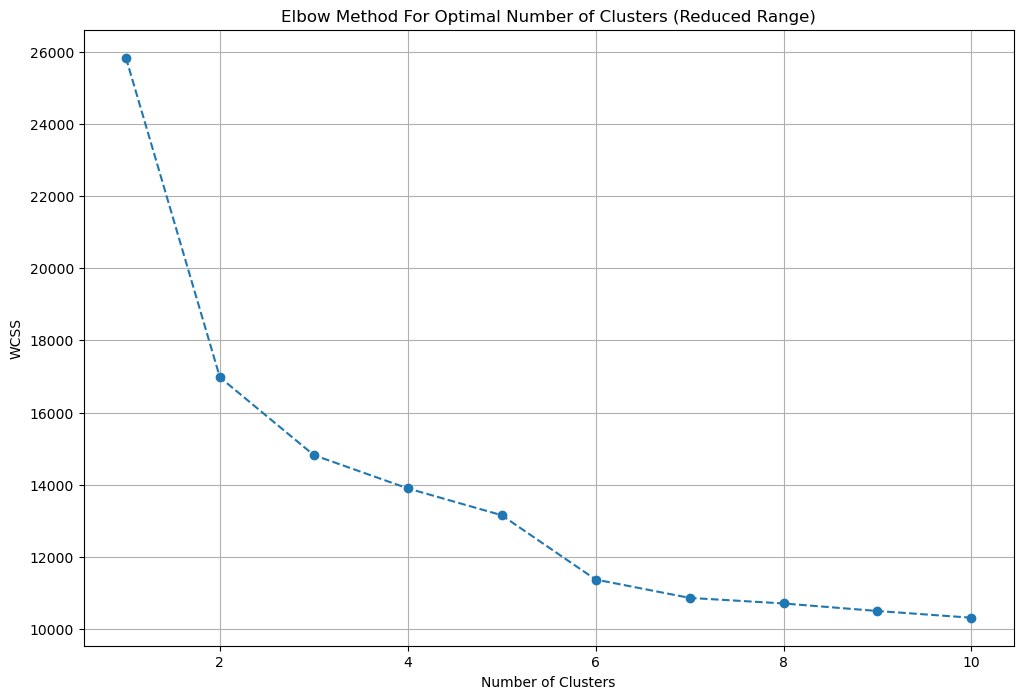

In [65]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [66]:
# at no.of clusters = 2 our graph is stagnant so only two clusters are forming that is luxirous and budget only which is not suitable since we have 130 categories

In [67]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row --> working all col. access then multiply corresponding to val of dict and add all col val
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [68]:
df['luxury_score'] = luxury_score

In [69]:
df.head(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,independent,sector 28,4.50,125000.0,360.0,Built Up area: 360 (33.45 sq.m.),4,4,0,not available,4.0,NaN,Undefined,NaN,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,360.0,NaN,0,0,0,0,0,0,[],0
1,flat,emaar mgf the palm drive,sector 66,2.80,14358.0,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up area: 1920 sq.ft. (178.37 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),3,3,2,"servant room,study room,pooja room",12.0,East,New Property,"['Sector 55-56 Rapid Metro Station', 'HUB 66', 'NH 248A', 'Hasanpur', 'Ashoka International School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi International Airport', 'Sealdah', 'Vatika Business Centre', 'The Oberoi Gurgaon', 'De Adventure Park', 'DLF Golf and Country Club', 'Tau DeviLal Sports Complex']","['6 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '5 Geyser', '1 Stove', '5 Light', '1 Modular Kitchen', '1 Curtains', '3 TV', '1 Chimney', '5 AC', '4 Bed', '5 Wardrobe', '1 Sofa', 'No Microwave', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1950.0,1920.0,1600.0,1,1,0,1,0,2,"[Security / Fire Alarm, Power Back-up, Intercom Facility, Lift(s), Maintenance Staff, Piped-gas, Visitor Parking, Swimming Pool, Park, Security Personnel, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",69
2,flat,hero homes,sector 104,1.90,11249.0,1689.0,Super Built up area 1689(156.91 sq.m.)Carpet area: 1082 sq.ft. (100.52 sq.m.),3,3,3,pooja room,16.0,NaN,Under Construction,"['Basai Metro Station', 'HUDA Market', 'Dwarka Expressway', 'Kings International School', 'Aryan Hospital', 'IGI Airport', 'Gurugram Railway Station']","['1 Water Purifier', '1 Exhaust Fan', '3 Geyser', '5 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1689.0,NaN,1082.0,0,0,0,1,0,1,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Water purifier, Maintenance Staff, Water Storage, No open drainage around, Piped-gas, Swimming Pool, Park, Security Personnel, Natural Light, Internet/wi-fi connectivity, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center]",103
3,house,independent,sector 50,10.56,32593.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3,servant room,3.0,NaN,Moderately Old,"['Radhakrishna Shani Mandir', 'Standard chartered ATM', 'Icici bank ATM', 'Vatsalya Clinic', 'Meher Clinic', 'Bones Clinic - Orthopaedics', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Neelkanth Health Care', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Skin Clinic', 'Best Urologist Atcomplete Family Clinic', 'Divine Look Clinic Centre', 'Sukhmani Hospital Pvt. Ltd', ""DR AKRAM

In [70]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [71]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1571,flat,tulip monsella,sector 53,7.40,33198.0,2229.0,Carpet area: 2229 (207.08 sq.m.),4,4,3,21.0,NaN,Under Construction,NaN,NaN,2229.0,0,0,0,0,0,0,35
1704,flat,imperia the esfera,sector 37c,0.99,5454.0,1815.0,Super Built up area 1815(168.62 sq.m.)Carpet area: 1510 sq.ft. (140.28 sq.m.),3,4,3,9.0,North-East,Relatively New,1815.0,NaN,1510.0,0,1,0,0,0,0,49
2565,flat,tulip violet,sector 69,3.10,9822.0,3156.0,Super Built up area 3156(293.2 sq.m.)Carpet area: 2500 sq.ft. (232.26 sq.m.),4,6,3+,14.0,North,Relatively New,3156.0,NaN,2500.0,0,1,0,1,0,0,174
1491,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,2,57
648,house,independent,sector 5,3.50,14787.0,2367.0,Plot area 263(219.9 sq.m.),5,4,2,2.0,North,Old Property,NaN,2367.0,NaN,0,0,0,1,1,0,36


In [72]:
df.shape

(3674, 23)

In [73]:
#df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)

In [74]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 28,4.50,125000.0,360.0,Built Up area: 360 (33.45 sq.m.),4,4,0,4.0,NaN,Undefined,NaN,360.0,NaN,0,0,0,0,0,0,0
1,flat,emaar mgf the palm drive,sector 66,2.80,14358.0,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up area: 1920 sq.ft. (178.37 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),3,3,2,12.0,East,New Property,1950.0,1920.0,1600.0,1,1,0,1,0,2,69
2,flat,hero homes,sector 104,1.90,11249.0,1689.0,Super Built up area 1689(156.91 sq.m.)Carpet area: 1082 sq.ft. (100.52 sq.m.),3,3,3,16.0,NaN,Under Construction,1689.0,NaN,1082.0,0,0,0,1,0,1,103
3,house,independent,sector 50,10.56,32593.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3,3.0,NaN,Moderately Old,NaN,3240.0,NaN,0,1,0,0,0,0,20
4,house,not applicable,sector 11,2.20,12222.0,1800.0,Plot area 1800(167.23 sq.m.),4,3,2,1.0,South,Old Property,NaN,1800.0,NaN,1,0,0,1,0,0,24
